In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("C:/Users/rocke/OneDrive/Desktop/assignment/Decision Tree/heart_disease.xlsx",sheet_name="Heart_disease")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [134]:
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [114]:
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

In [115]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


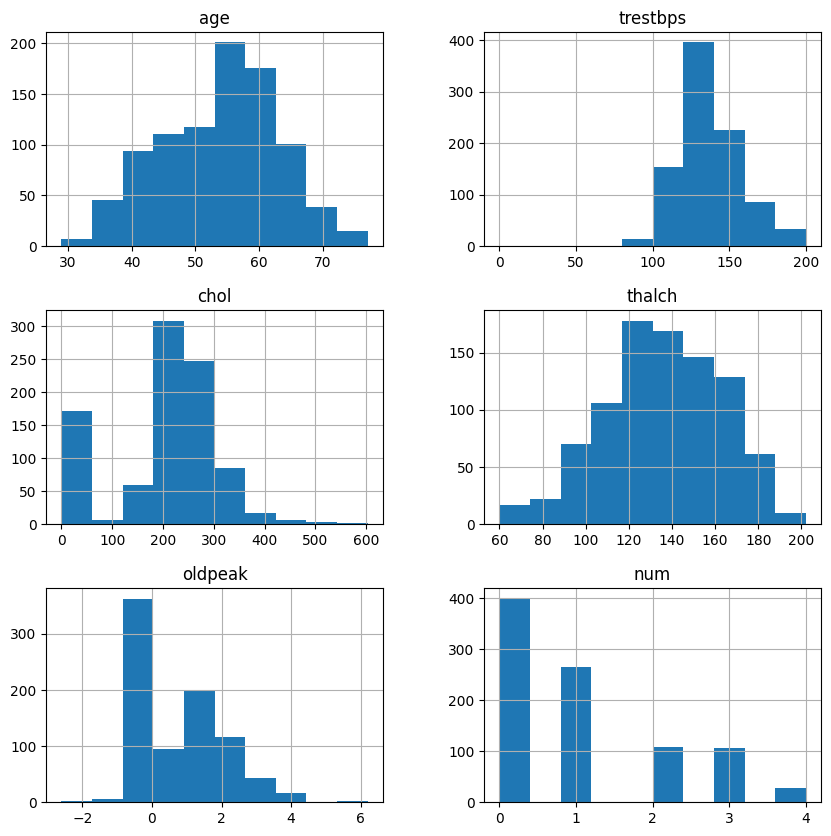

In [135]:
# Histograms
data.hist(figsize=(10, 10))
plt.show()

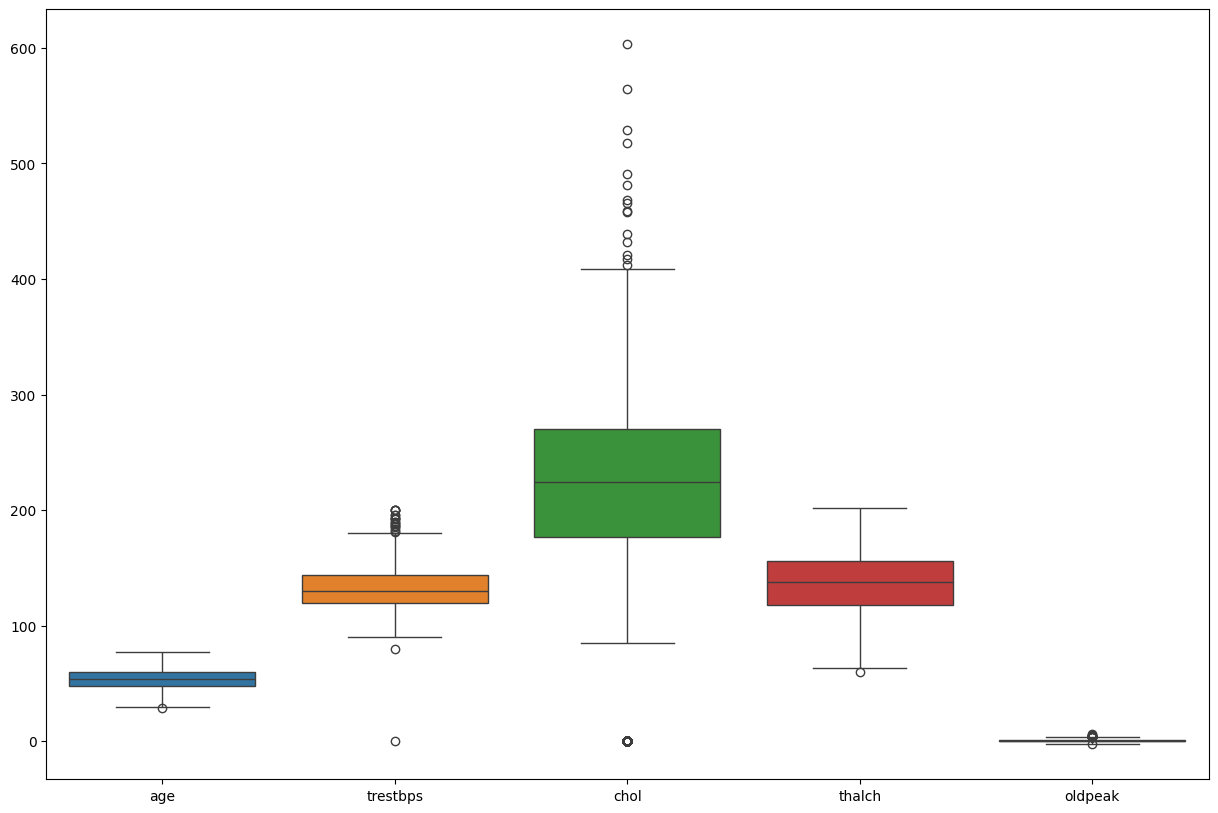

In [136]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])
plt.show()

C:\Users\rocke\AppData\Local\Temp\ipykernel_12340\3527037384.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


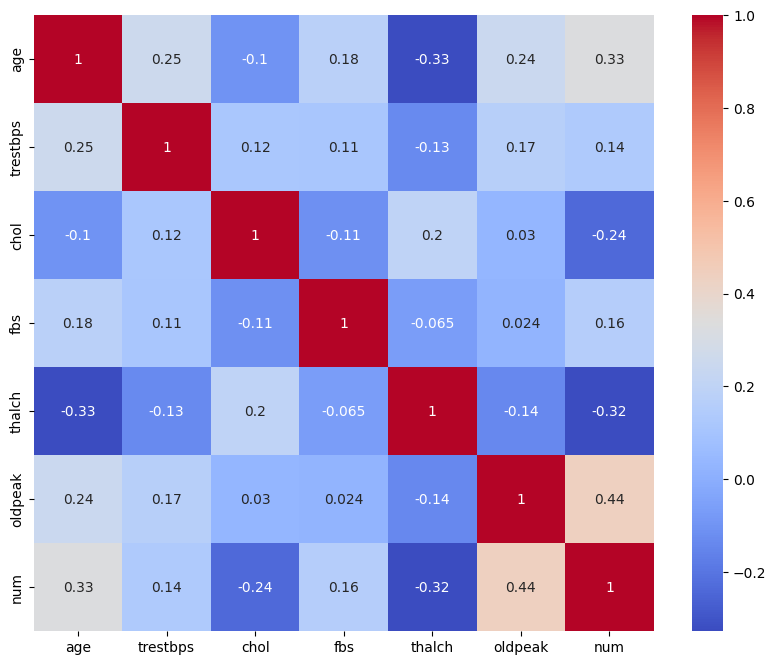

In [137]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [138]:
# Handle missing values
data['oldpeak'].fillna(data['oldpeak'].mean(), inplace=True)

In [139]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)
data_encoded.head()

,age,trestbps,chol,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
1,41,135,203,132,0.0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,57,140,192,148,0.4,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,52,118,186,190,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
4,57,110,201,126,1.5,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0


In [198]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay

# Split the dataset into training and testing sets
X = data_encoded.drop('num', axis=1)
y = data_encoded['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [199]:
# Implement the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [200]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

In [201]:
# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.5439560439560439
Precision: 0.5367018658649376
Recall: 0.5439560439560439
F1 Score: 0.5313480421754502
ROC AUC Score: 0.6021066442251779

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.73        80
           1       0.49      0.54      0.51        56
           2       0.16      0.18      0.17        17
           3       0.50      0.21      0.29        24
           4       0.00      0.00      0.00         5

    accuracy                           0.54       182
   macro avg       0.37      0.34      0.34       182
weighted avg       0.54      0.54      0.53       182



In [202]:
# Classification report
report = classification_report(y_test, y_pred)

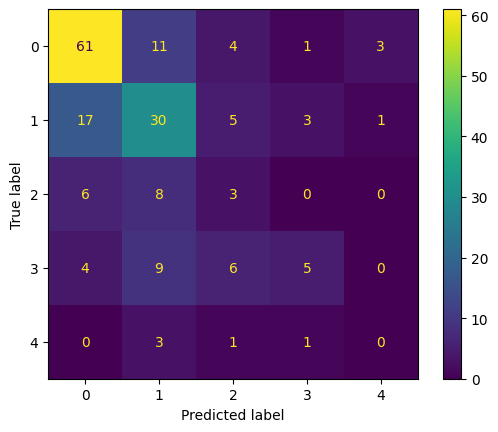

In [203]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [204]:
accuracy, precision, recall, f1, roc_auc, report

(0.5439560439560439,
 0.5367018658649376,
 0.5439560439560439,
 0.5313480421754502,
 0.6021066442251779,
 '              precision    recall  f1-score   support\n\n           0       0.69      0.76      0.73        80\n           1       0.49      0.54      0.51        56\n           2       0.16      0.18      0.17        17\n           3       0.50      0.21      0.29        24\n           4       0.00      0.00      0.00         5\n\n    accuracy                           0.54       182\n   macro avg       0.37      0.34      0.34       182\nweighted avg       0.54      0.54      0.53       182\n')

In [205]:
# Define the hyperparameters and perform GridSearchCV for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [206]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

In [207]:
# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
roc_auc_best = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [208]:
# Print evaluation metrics
print(f'Best Accuracy: {accuracy_best}')
print(f'Best Precision: {precision_best}')
print(f'Best Recall: {recall_best}')
print(f'Best F1 Score: {f1_best}')
print(f'Best ROC AUC Score: {roc_auc_best}')
print('\nBest Classification Report:')
print(classification_report(y_test, y_pred_best))

Best Accuracy: 0.489010989010989
Best Precision: 0.44314601130822007
Best Recall: 0.489010989010989
Best F1 Score: 0.4594073813854034
Best ROC AUC Score: 0.5991823682136154

Best Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.76      0.70        80
           1       0.41      0.45      0.43        56
           2       0.06      0.06      0.06        17
           3       0.22      0.08      0.12        24
           4       0.00      0.00      0.00         5

    accuracy                           0.49       182
   macro avg       0.27      0.27      0.26       182
weighted avg       0.44      0.49      0.46       182



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


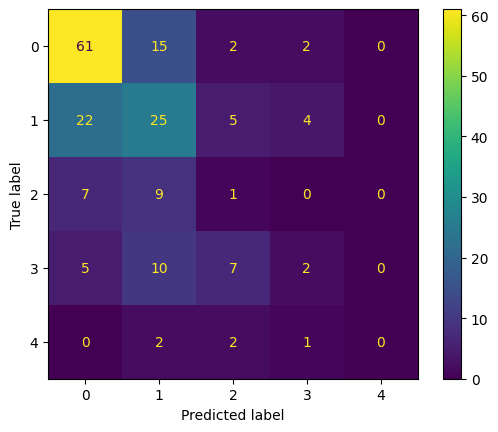

In [209]:
# Confusion Matrix for the best model
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

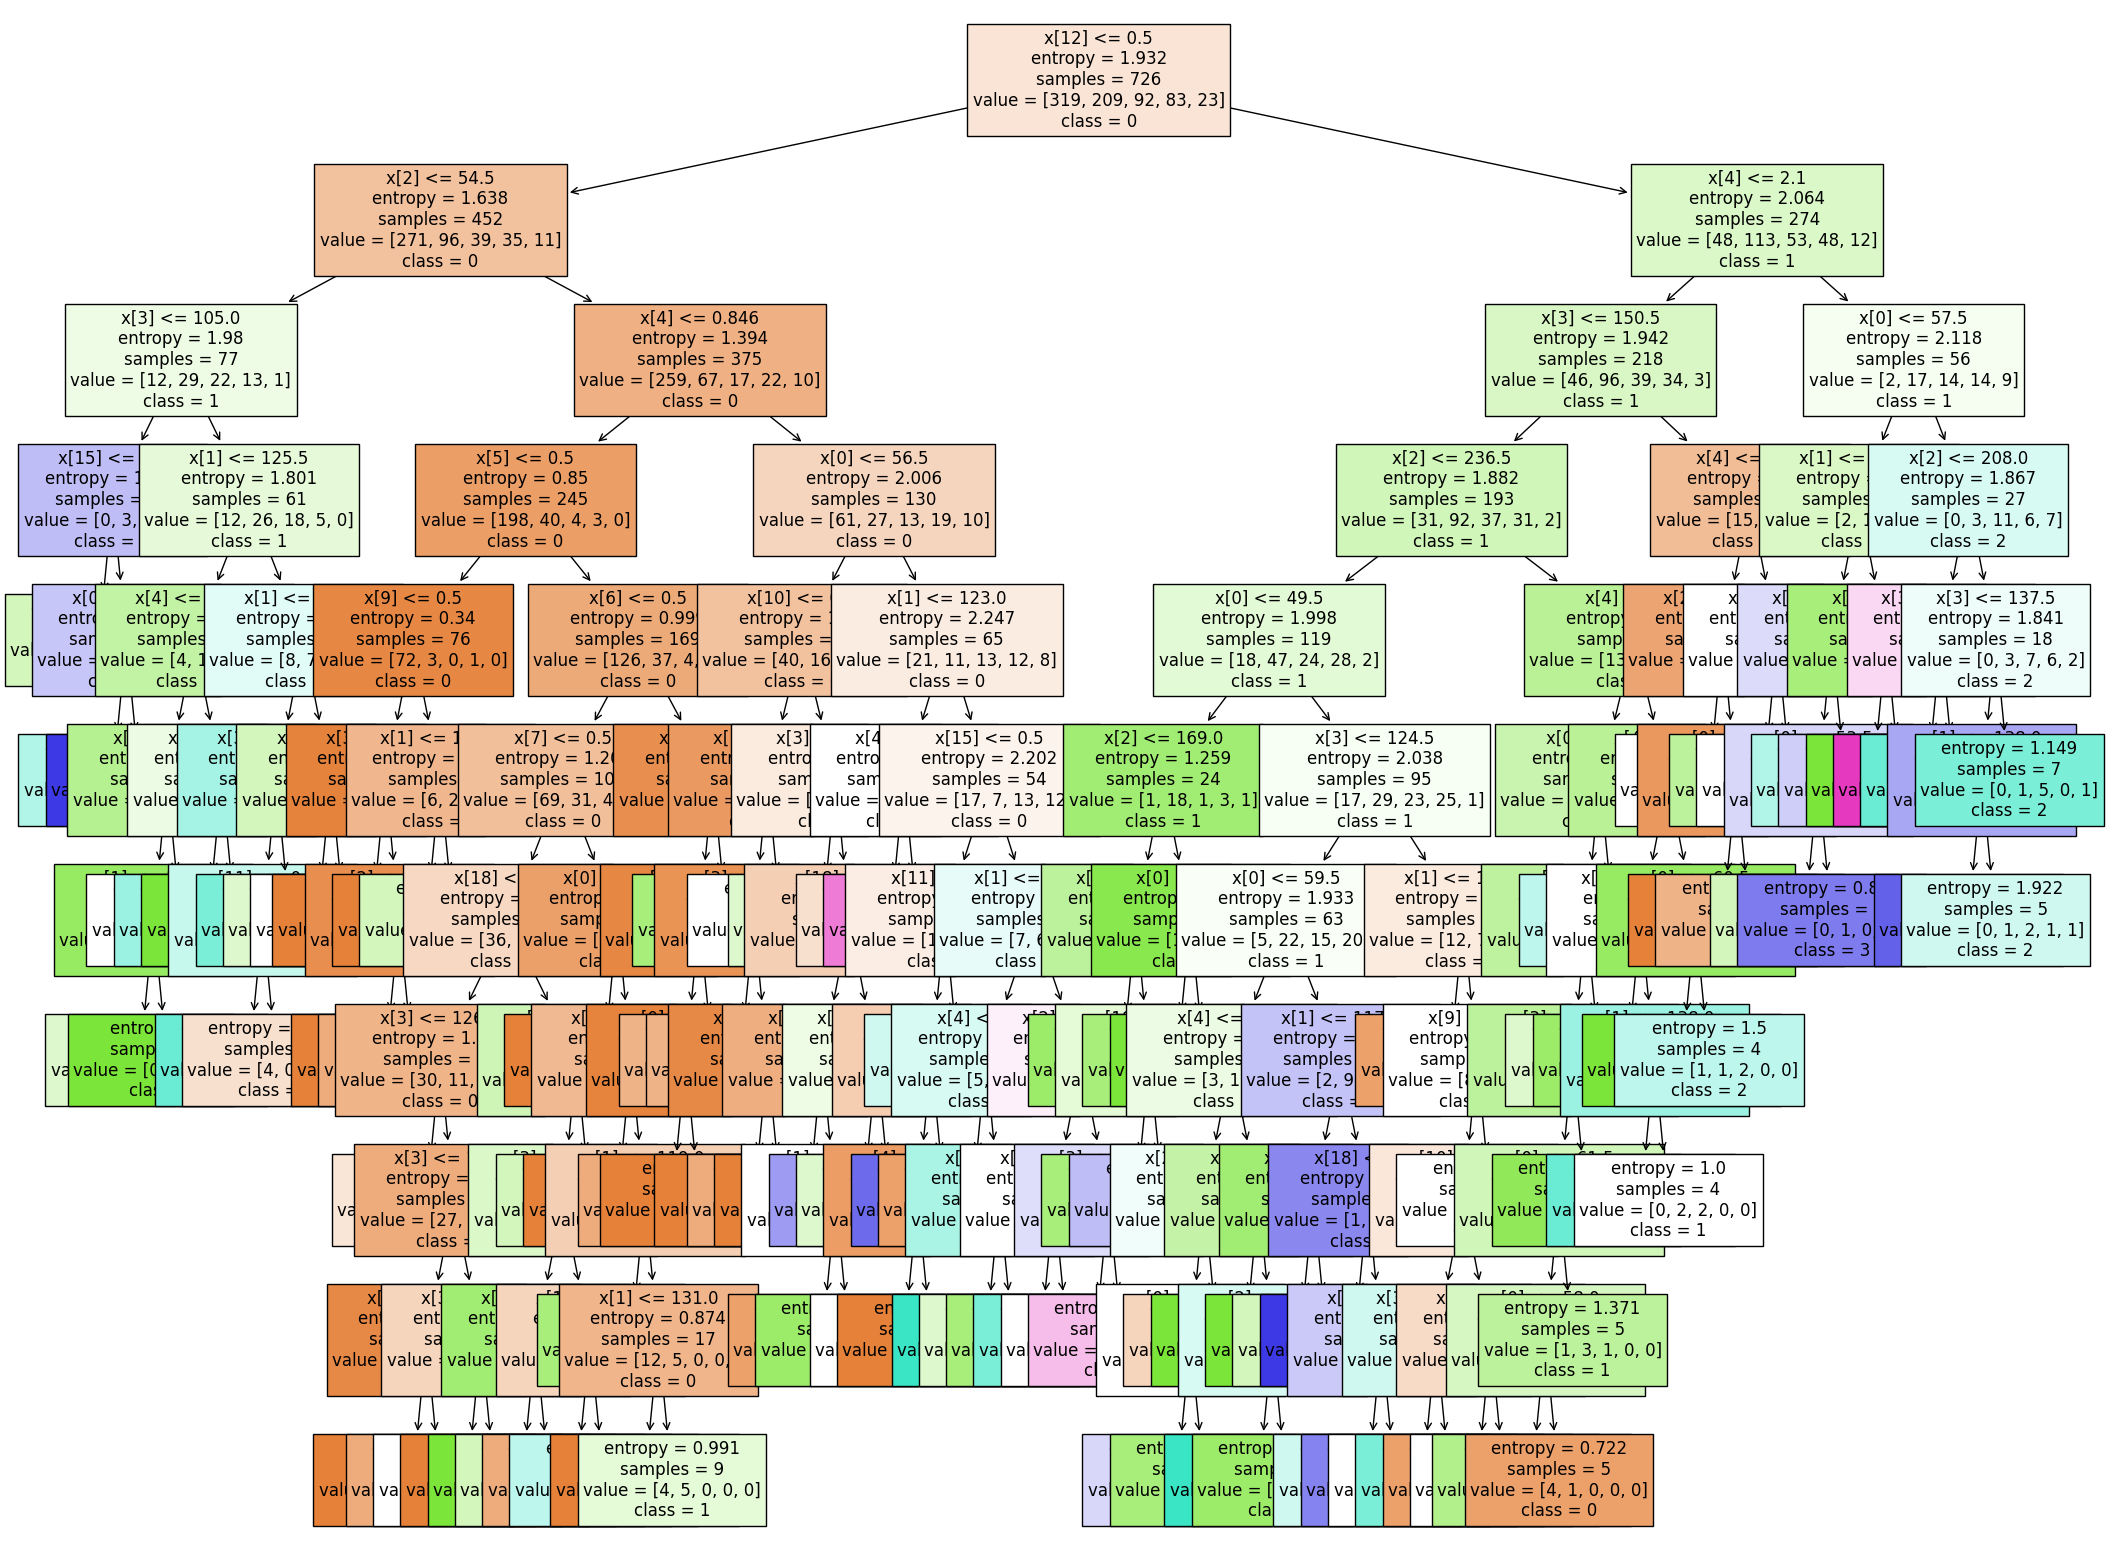

In [211]:
# Visualize the decision tree structure
plt.figure(figsize=(25, 20))
plot_tree(best_model, feature_names=None, class_names=['0', '1', '2', '3', '4'], filled=True,fontsize=12)
plt.show()

In [ ]:
''''Interview Questions:'''

In [ ]:
#1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Ans: 
    Common Hyperparameters of Decision Tree Models and Their Effects

1)#criterion:

Description: This hyperparameter determines the function to measure the quality of a split.
Options: 'gini' (Gini impurity), 'entropy' (Information gain)
Effect: Choosing between Gini impurity and entropy can slightly influence the splits the model makes. In practice, the performance difference between these criteria is often minimal.

2)#max_depth:

Description: The maximum depth of the tree.
Effect: Restricting the maximum depth helps prevent overfitting. A shallow tree (small max_depth) may underfit the data, while a very deep tree (large or None max_depth) may overfit.

3)#min_samples_split:

Description: The minimum number of samples required to split an internal node.
Effect: Increasing this value can help prevent overfitting. For instance, if set to 50, a node must have at least 50 samples to be considered for splitting. Smaller values make the model more flexible but increase the risk of overfitting.

4)#min_samples_leaf:

Description: The minimum number of samples that a leaf node must have.
Effect: This parameter helps prevent overfitting by ensuring that leaf nodes have a minimum number of samples. Larger values will produce a more generalized model.

5)#max_features:

Description: The number of features to consider when looking for the best split.
Options: An integer, float, 'auto', 'sqrt', 'log2', or None
Effect: Limiting the number of features can introduce randomness into the model and can help to prevent overfitting. This is particularly useful in ensemble methods like Random Forests.

6)#random_state:

Description: Controls the randomness of the estimator.
Effect: Setting a fixed random state ensures reproducibility of the model's results.

7)#splitter:

Description: The strategy used to choose the split at each node.
Options: 'best', 'random'
Effect: 'best' splits at the best feature found, whereas 'random' selects a random feature to split on. Random splitting can introduce more randomness and potentially lead to a more generalized model, especially useful in ensemble methods.

8)#class_weight:

Description: Weights associated with classes.
Options: 'balanced', dictionary, or None
Effect: Helps handle class imbalance by adjusting the weight of each class, ensuring that the model pays more attention to the minority class.

In [ ]:
#2. What is the difference between the Label encoding and One-hot encoding?
Ans:
     Difference Between Label Encoding and One-Hot Encoding

1)#Label Encoding:

Description: Label Encoding converts categorical features to numeric by assigning a unique integer to each category.
Example: For a feature color with categories ['red', 'green', 'blue'], label encoding may convert these to [0, 1, 2].
Use Case: Suitable for ordinal categorical variables where the categories have an inherent order (e.g., low, medium, high).
Drawback: For nominal categorical variables (no inherent order), label encoding can be misleading because the model may assume that the encoded values have a certain order or hierarchy, which can introduce bias.

2)#One-Hot Encoding:

Description: One-Hot Encoding converts each category into a new binary column (one column per category) with a value of 1 or 0.
Example: For the same color feature, one-hot encoding would create new columns [color_red, color_green, color_blue] with binary values.
red -> [1, 0, 0]
green -> [0, 1, 0]
blue -> [0, 0, 1]
Use Case: Suitable for nominal categorical variables where there is no inherent order among categories.
Drawback: Can lead to a significant increase in the dimensionality of the dataset, especially if there are many unique categories.